In [1]:
# 0.01 Call libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#0.02 Import Data
trial_input=pd.read_csv("HWK 05 Pymaceuticals Clinical Trial data.csv")
mouse_input=pd.read_csv("HWK 05 Pymaceuticals Mouse Drug data.csv")

In [3]:
#0.03 BASIC ANALYSIS IN TRIAL INPUT
#trial_input.head()
#trial_input.dtypes
#trial_input["Mouse ID"].nunique() = TOTAL MICE
#trial_input["Timepoint"].unique()

In [4]:
#0.04 BASIS ANALYSIS IN MOUSE INPUT
#mouse_input.head()
#mouse_input["Drug"].unique() = All Drugs
#mouse_input["Drug"].nunique() = Total Drugs

In [5]:
#0.05 Important variables
timepoint=trial_input["Timepoint"].unique()
drugs=mouse_input["Drug"].unique()
mice=trial_input["Mouse ID"].unique()

In [6]:
#0.06 Merge the 2 bases by Mouse ID

Complete_base=trial_input.merge(mouse_input,on="Mouse ID")
Complete_base.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
#0.08 Average values by Drug - Timepoint

AVG_by_drug=Complete_base.groupby(["Drug","Timepoint"]).mean()

#Tumor Volume Average
AVG_by_drug_volume=AVG_by_drug.loc[:,["Tumor Volume (mm3)"]]
AVG_by_drug_volume=AVG_by_drug_volume.rename(columns={"Tumor Volume (mm3)":"AVG Tumor Volume (mm3)"})

#Metastatic Sites Average
AVG_by_drug_metastatic=AVG_by_drug.loc[:,["Metastatic Sites"]]
AVG_by_drug_metastatic=AVG_by_drug_metastatic.rename(columns={"Metastatic Sites":"AVG Metastatic Sites"})

In [8]:
#0.09 Create Starting Table by Drug with all the Timepoints each

analysis=pd.DataFrame(AVG_by_drug.index.tolist())
analysis=analysis.rename(columns={0:"Drug",1:"Timepoint"})
analysis.head()

,Drug,Timepoint
0,Capomulin,0
1,Capomulin,5
2,Capomulin,10
3,Capomulin,15
4,Capomulin,20


In [9]:
#0.10 Standard Error Values by Drug - Timepoint
SEM_by_drug=Complete_base.groupby(["Drug","Timepoint"]).sem()

#Tumor Volume Standard Error
SEM_volume_by_drug=SEM_by_drug.loc[:,["Tumor Volume (mm3)"]]
SEM_volume_by_drug=SEM_volume_by_drug.rename(columns={"Tumor Volume (mm3)":"SError Tumor Volume (mm3)"})

#Metastatic Sites Standard Error
SEM_metastatic_by_drug=SEM_by_drug.loc[:,["Metastatic Sites"]]
SEM_metastatic_by_drug=SEM_metastatic_by_drug.rename(columns={"Metastatic Sites":"SError Metastatic Sites"})

In [10]:
#1.0 TUMOR SIZE DATAFRAME

analysis_tumor=analysis
analysis_tumor=analysis_tumor.merge(AVG_by_drug_volume,on=["Drug","Timepoint"])
analysis_tumor=analysis_tumor.loc[:,["Drug","Timepoint","AVG Tumor Volume (mm3)"]]
analysis_tumor=analysis_tumor.merge(SEM_volume_by_drug,on=["Drug","Timepoint"])
analysis_tumor.head()

,Drug,Timepoint,AVG Tumor Volume (mm3),SError Tumor Volume (mm3)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [37]:
#1.01 Average Tumor Size Pivot Table

average_tumor_pt=analysis_tumor.pivot_table("AVG Tumor Volume (mm3)","Timepoint","Drug")
average_tumor_pt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
#1.02 Standard Error Tumor Size Pivot Table

serror_tumor_pt=analysis_tumor.pivot_table("SError Tumor Volume (mm3)","Timepoint","Drug")
serror_tumor_pt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


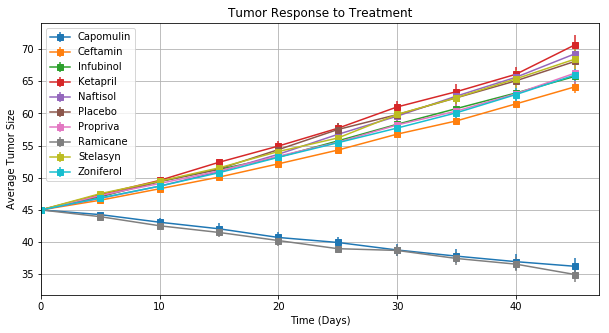

In [13]:
#1.03 PLOT Tumor Response to Treatment 1

Tumor_Average_plot=average_tumor_pt.plot(figsize=(10,5),grid=True,fmt="-s",yerr=serror_tumor_pt)
plt.legend(loc="upper left")
plt.xlim(right=max(timepoint)+2)
plt.title("Tumor Response to Treatment")
plt.ylabel("Average Tumor Size")
plt.xlabel("Time (Days)")
plt.show()

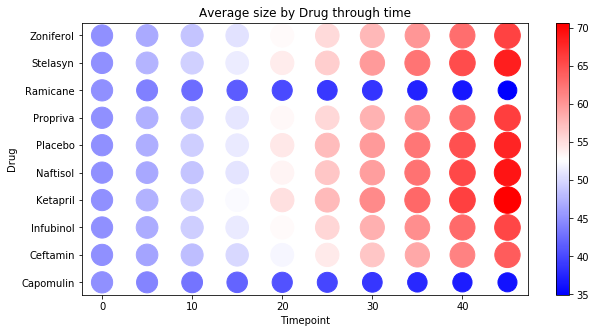

In [14]:
#1.04 Scatter Tumor Response to Treatment 2

plt.figure(figsize=(10,5))

scatter_tumor=plt.scatter(analysis_tumor["Timepoint"],
                    analysis_tumor["Drug"],
                    s=analysis_tumor["AVG Tumor Volume (mm3)"]*10,
                    c=analysis_tumor["AVG Tumor Volume (mm3)"],
                         cmap="bwr")

plt.colorbar(scatter_tumor)
plt.xlabel("Timepoint")
plt.ylabel("Drug")
plt.title("Average size by Drug through time")

plt.show()

In [15]:
#2.0 METASTATIC SITES DATAFRAME

analysis_metastatic=analysis

analysis_metastatic=analysis_metastatic.merge(AVG_by_drug_metastatic,on=["Drug","Timepoint"])
analysis_metastatic=analysis_metastatic.merge(SEM_metastatic_by_drug,on=["Drug","Timepoint"])
analysis_metastatic.head()

,Drug,Timepoint,AVG Metastatic Sites,SError Metastatic Sites
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [40]:
#2.01 Average Metastatic Sites Pivot Table

average_metastatic_pt=analysis_metastatic.pivot_table("AVG Metastatic Sites","Timepoint","Drug")
average_metastatic_pt


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [38]:
#2.02 Standard Error Metastatic Sites Pivot Table

serror_metastatic_pt=analysis_metastatic.pivot_table("SError Metastatic Sites","Timepoint","Drug")
serror_metastatic_pt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


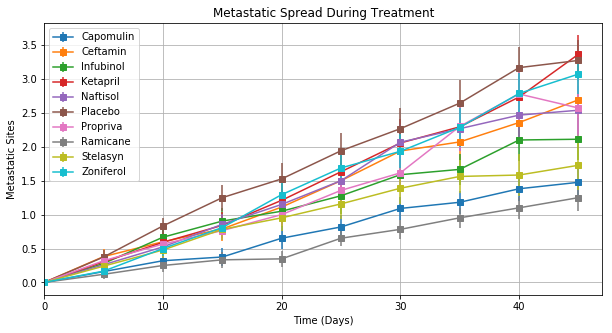

In [18]:
#2.03 Metastatic Spread During Treatment Plot with Standard Error Bars

Metastatic_Average_SError_plot=average_metastatic_pt.plot(yerr=serror_metastatic_pt,fmt="-s",figsize=(10,5),grid=True)
plt.legend(loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlim(right=max(timepoint)+2)
plt.xlabel("Time (Days)")
plt.show()

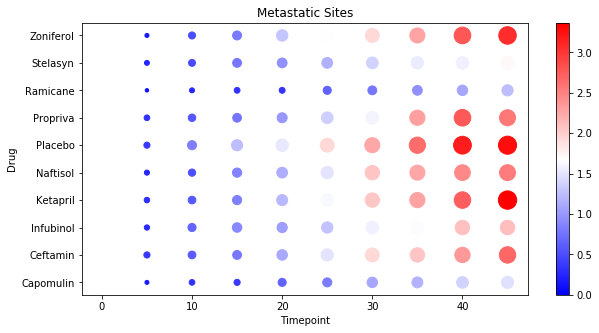

In [19]:
#2.04 Metastatic Spread During Treatment Plot 2
plt.figure(figsize=(10,5))

scatter_metastatic=plt.scatter(analysis_metastatic["Timepoint"],
                    analysis_metastatic["Drug"],
                    s=analysis_metastatic["AVG Metastatic Sites"]*100,
                    c=analysis_metastatic["AVG Metastatic Sites"],
                              cmap="bwr")

plt.colorbar(scatter_metastatic)
plt.xlabel("Timepoint")
plt.ylabel("Drug")
plt.title("Metastatic Sites")

plt.show()

In [33]:
#3.0 SURVIVAL RATE

#3.01 Total count for Drug-Timepoint
mice_count=Complete_base.groupby(["Drug","Timepoint"]).count()
mice_count=mice_count.loc[:,["Mouse ID"]]

analysis_mice=analysis
analysis_mice=analysis_mice.merge(mice_count,on=["Drug","Timepoint"])

#3.02 Initial Mice count for each Drug
total_mice=analysis_mice.loc[(analysis_mice["Timepoint"]==0),:]
total_mice=total_mice.rename(columns={"Mouse ID":"Total Mice"})

#3.03 Merge
analysis_mice=analysis_mice.merge(total_mice,on=["Drug"])

#3.04 % of Survival rate calculation
analysis_mice["% Survival"]=analysis_mice["Mouse ID"]/analysis_mice["Total Mice"]*100

#3.05 Final DataFrame columns
analysis_mice=analysis_mice.loc[:,["Drug","Timepoint_x","Mouse ID","% Survival"]]
analysis_mice=analysis_mice.rename(columns={"Timepoint_x":"Timepoint","Mouse ID":"Surviving Mice"})
analysis_mice.head()

,Drug,Timepoint,Surviving Mice,% Survival
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [39]:
#3.07 Survival Rate Pivot Table

mice_count_pt=analysis_mice.pivot_table("% Survival","Timepoint","Drug")
mice_count_pt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


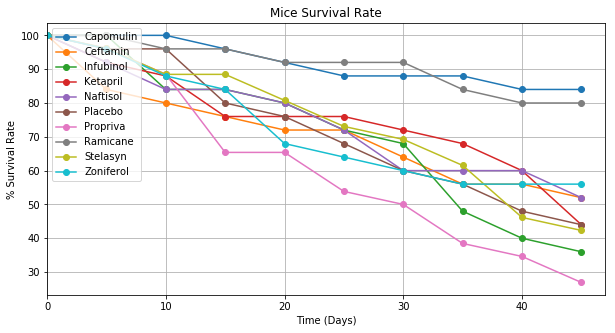

In [23]:
#3.08 Survival Rate Plot 1

mice_count_plot=mice_count_pt.plot(style="o",figsize=(10,5),grid=True,linestyle="-")

#3.08.01 Format
plt.legend(loc="upper left")
plt.title("Mice Survival Rate")
plt.ylabel("% Survival Rate")
plt.xlabel("Time (Days)")
plt.xlim(right=max(timepoint)+2)
plt.show()

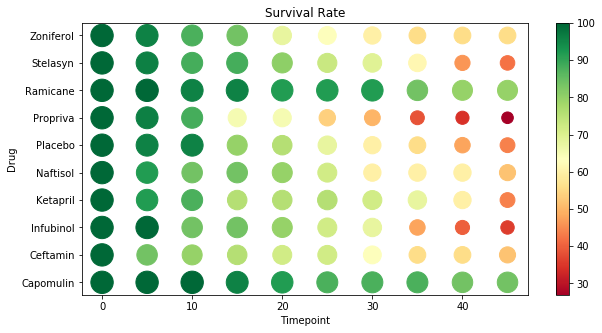

In [24]:
#3.09 Survival Rate Plot 2
plt.figure(figsize=(10,5))

scatter_mice=plt.scatter(analysis_mice["Timepoint"],
                    analysis_mice["Drug"],
                    s=analysis_mice["% Survival"]*5,
                    c=analysis_mice["% Survival"],
                        cmap="RdYlGn")

#3.09.01 Format
plt.colorbar(scatter_mice)
plt.xlabel("Timepoint")
plt.ylabel("Drug")
plt.title("Survival Rate")

plt.show()

In [36]:
#4.0 TUMOR VOLUME CHANGE

#4.01 Initial tumor volume
initial_tumor=analysis_tumor.loc[(analysis_tumor["Timepoint"]==0),:]
initial_tumor=initial_tumor.loc[:,["Drug","AVG Tumor Volume (mm3)"]]
tumor_change=initial_tumor.rename(columns={"AVG Tumor Volume (mm3)":"Initial AVG Tumor Volume (mm3)"})
#initial_tumor

#4.02 Final tumor volume
final_tumor=analysis_tumor.loc[(analysis_tumor["Timepoint"]==45),:]
final_tumor=final_tumor.loc[:,["Drug","AVG Tumor Volume (mm3)"]]
final_tumor=final_tumor.rename(columns={"AVG Tumor Volume (mm3)":"Final AVG Tumor Volume (mm3)"})
#final_tumor

#4.03 Merge Initial and Final Tumor Volume Dataframes
tumor_change=tumor_change.merge(final_tumor,on="Drug")

#4.04 Calculate Tumor Volume change
tumor_change["Change AVG Tumor Volume (mm3)"]=(tumor_change["Final AVG Tumor Volume (mm3)"]/tumor_change["Initial AVG Tumor Volume (mm3)"]-1)*100

#4.05 Delete Initial and final Tumor Volume Columns
tumor_change=tumor_change.loc[:,["Drug","Change AVG Tumor Volume (mm3)"]]
#tumor_change

#4.06 Classification of Drugs in Passing (if tumor volume reduced) and Failing (if tumor volume increased)
tumor_change["Drug Results"]= tumor_change["Change AVG Tumor Volume (mm3)"].apply(lambda x: "Passing" if x<0 else "Failing")

#4.07 Identify Placebo values
tumor_change.loc[(tumor_change["Drug"]=="Placebo"),"Drug Results"]="Placebo"

tumor_change

,Drug,Change AVG Tumor Volume (mm3),Drug Results
0,Capomulin,-19.475303,Passing
1,Ceftamin,42.516492,Failing
2,Infubinol,46.123472,Failing
3,Ketapril,57.028795,Failing
4,Naftisol,53.923347,Failing
5,Placebo,51.297960,Placebo
6,Propriva,47.241175,Failing
7,Ramicane,-22.320900,Passing
8,Stelasyn,52.085134,Failing
9,Zoniferol,46.579751,Failing


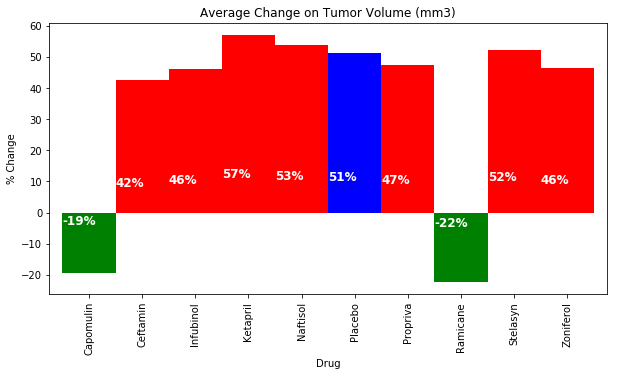

In [32]:
#4.08 Plot

ax=tumor_change.plot.bar(x="Drug",y="Change AVG Tumor Volume (mm3)",
                      color=tumor_change["Drug Results"].map({"Passing":"g","Failing":"r","Placebo":"b"}),
                      width=1,legend=False,figsize=(10,5))

#4.08.01 Format
plt.title("Average Change on Tumor Volume (mm3)")
plt.xlabel("Drug")
plt.ylabel("% Change")

#4.08.02 Define labels with % change
labels=(tumor_change["Change AVG Tumor Volume (mm3)"]/100).map("{0:.3%}".format)

#Column colors and % labels
for i in ax.patches:
    ax.annotate(str(int(i.get_height()))+"%",(i.get_x(),i.get_height()*.20),color="w",fontsize=12, fontweight="bold")